# 构建数据与函数，绘制图像

In [1]:
import numpy as np#导入数组、矩阵运算功能库
random_data=np.random.random((20, 2))#产出随机数组，20行2列
X = random_data[:,0]#取random_data所有子列表中第一个元素
y = random_data[:,1]#取random_data所有子列表中第二个元素

In [2]:
import random
# 在我们的日常生活中是常见的
    # 体重 -> 高血压的概率
    # 收入 -> 买阿玛尼的概率
    # 其实都是一种潜在的函数关系 + 一个随机变化
def assmuing_function(x):
    return 13.4*x + 5 + random.randint(-5,5)#random.randint(-5,5)返回整数
y = [assmuing_function(x) for x in X]

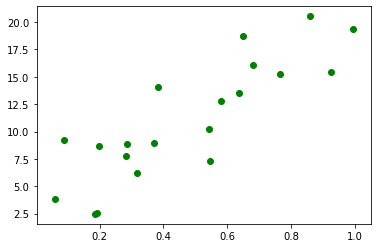

In [3]:
%matplotlib inline
#是jupyter notebook里的命令，将那些用matplotlib绘制的图显示在页面里而不是弹出一个窗口
import matplotlib.pyplot as plt#Matplotlib是Python中的一个2D绘图工具
plt.scatter(X,y,Color='green')#画散点图,默认点为蓝色

In [4]:
y = np.array(y)#将y转化为数组

# Regression 回归 -> Real Number
# Classification ->[0,0,0,1],[0,1,0,0]

# 构建回归线性函数，绘制图像（回归：收集X与Y =>确定模型）

In [5]:
from sklearn.linear_model import LinearRegression

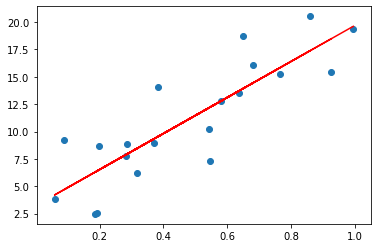

In [6]:
reg = LinearRegression().fit(X.reshape(-1,1),y)#.fit(X,y)拟合数据
reg.score(X.reshape(-1,1),y)# X.reshape(-1,1),把数据处理成类似1列的形式
#.score()返回该次预测的系数R2
reg.coef_#自变量的系数
reg.intercept_#线性关系中的常数
def f(x):#构建线性函数，f(x)=kx+c
    return reg.coef_ * x + reg.intercept_
plt.scatter(X, y)#散点图
plt.plot(X,f(X),color='red')#绘制f(X)曲线，函数曲线为红色

In [7]:
reg.predict([[0.3]])#用线性函数计算X=0.9时的结果

array([8.1764161])

# 构建 KNN model

In [8]:
from scipy.spatial.distance import cosine#此函数 计算一维数组之间的余弦距离
def distance(x1,x2):
    return cosine(x1,x2)
def model(X,y):
    return [(Xi,yi) for Xi,yi in zip(X,y)]
#zip函数将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表
def predict(x,k=5):
    most_similars =sorted(model(X,y), key=lambda xi:distance(xi[0],x))[:k]
    #将X向量中每个元素与x值计算出来的cosine值排序，取前5个
    y_hats = [_y for x, _y in most_similars]
    print(most_similars)#打印（X,y）组成的列表
    return np.mean(y_hats)#返回5个y的均值
myself_knn = model(X,y)
predict(0.3)

[(0.2872261951612095, 8.848831015160208), (0.05907325183325518, 3.791581574565619), (0.9948052413411821, 19.33039023397184), (0.5466040740972365, 7.324494592902969), (0.5426959660384373, 10.27212594491506)]


9.913484672303138

## NOT简简单单的学一个算法，看到背后的思维方式：

> 贝叶斯，线性回归，决策树，KNN

## 新的问题，是不存在现成的解决方案的，但是呢，我们可以依据前人比较成熟的思维方法，我们发明新的方法。

## How to implement a Decision Tree

In [9]:
from collections import Counter

## 1. 信息熵

$$ Entropy = -\sum_i^n Pr(x_i) log(Pr(x_i)) $$

## 2. Gini 纯度

$$ Gini = 1 - \sum_{i=1}^J P_i^2 $$

[1, 2, 3, 4, 4, 5, 5, 5, 6]
[1, 1, 1, 1, 1, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 3]
[4, 4, 4, 4, 4, 4, 4, 4, 4]

In [10]:
from icecream import ic

# 求熵函数（通用-很重要）

In [11]:
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    ic(probs)
    return - sum(p*np.log(p) for p in probs)#返回所有 p*In p 之和

In [12]:
entropy([1,1,1,1])#4/4

ic| probs: [1.0]


-0.0

In [13]:
entropy([1,1,1,0])

ic| probs: [0.25, 0.75]


0.5623351446188083

In [14]:
entropy([2,3,3,4])

ic| probs: [0.25, 0.5, 0.25]


1.0397207708399179

## 决策树怎么来决定，哪一个特征来进行分割呢？ 

In [15]:
mock_data={
    'gender':['F', 'F', 'F', 'F', 'M', 'M','M'],
    'income':['+10','-10','+10','+10','+10','+10','-10'],
    'family_number':[1,1,2,1,1,1,2],
    'pet':[1,1,1,0,0,0,1],
    'bought':[1,1,1,0,0,0,1],
}

In [16]:
import pandas as pd

In [17]:
dataset = pd.DataFrame.from_dict(mock_data)
dataset#将字典转化为DataFrame二维表

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
1,F,-10,1,1,1
2,F,+10,2,1,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0
6,M,-10,2,1,1


如果我们来了一个新的case
::: [F, -10, 2, 1] -> ?

::: [F, +10, 2, 0] -> ?

In [18]:
#split_by_gender 性别
print(entropy([1,1,1,0])+ entropy([0,0,1]))
#split_by_income
print(entropy([1,1,0,0,0])+entropy([1,1]))
#split_by_family_number
print(entropy([1,1,0,0,0])+entropy([1,1]))
#split_by_pet   最理想型，信息熵最小的最优
print(entropy([1,1,1,1])+entropy([0,0,0]))

ic| probs: [0.25, 0.75]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [1.0]


1.198849312913621
0.6730116670092565
0.6730116670092565
-0.0


## 决策树在选择决策过程，决策顺序的时候，其实是按照，根据这个特征，进行分割之后，数据的熵最少原则进行的。

In [19]:
set(mock_data['family_number'])

{1, 2}

In [20]:
set(mock_data['gender'])

{'F', 'M'}

In [21]:
sub_split_1 = dataset[dataset['family_number'] ==1]['bought'].tolist()
print(sub_split_1)#打印家庭成员为1的购买结果，返回list

[1, 1, 0, 0, 0]


In [22]:
splited_data=dataset[dataset['family_number']==1]
splited_data

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
1,F,-10,1,1,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0


In [23]:
splited_data[splited_data['income']=='+10']

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0


In [24]:
splited_data[splited_data['income']=='-10']

,gender,income,family_number,pet,bought
1,F,-10,1,1,1


## ==> 根据信息熵，我们得到了一个决策过程：

```
第一步： 我们观察他的家庭成员：
        如果他的家庭成员是2人，那么就会购买，如果不是2人，我们继续决策，进入下一步
第二部： 我们观察他的收入情况：
        如果他的收入是'+10'， 那么他有 3/4 的概率不会购买，如果是 '-10', 那么，他肯定买。
```

In [25]:
#split by gender
entropy([1,1,0])+entropy([0,0])

ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| probs: [1.0]


0.6365141682948128

In [26]:
#split by income ，按收入计算的结果就比按性别的结果更优
entropy([1,0,0,0])+entropy([1])

ic| probs: [0.75, 0.25]
ic| probs: [1.0]


0.5623351446188083

In [27]:
sub_split_1#家庭成员为1的购买情况

[1, 1, 0, 0, 0]

In [28]:
sub_split_2=dataset[dataset['family_number']!=1]['bought'].tolist()
sub_split_2   #家庭成员 不为1的购买情况，返回结果转化为list

[1, 1]

In [29]:
_sub_split_1=dataset[dataset['gender']!='F']['bought'].tolist()
_sub_split_1#性别M

[0, 0, 1]

In [30]:
_sub_split_2=dataset[dataset['gender']!='M']['bought'].tolist()
_sub_split_2

[1, 1, 1, 0]

In [31]:
entropy(_sub_split_1)+entropy(_sub_split_2)

ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.25, 0.75]


1.198849312913621

In [32]:
entropy(sub_split_1)+entropy(sub_split_2)

ic| probs: [0.6, 0.4]
ic| probs: [1.0]


0.6730116670092565

In [33]:
set(dataset.columns.tolist()) - {'bought'}#取dataset表中列名
#dataset是原始数据的DataFrame二维表

{'family_number', 'gender', 'income', 'pet'}

In [34]:
dataset

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
1,F,-10,1,1,1
2,F,+10,2,1,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0
6,M,-10,2,1,1


# 寻找最佳分类方式函数（通用-很重要）

In [35]:
def find_the_optimal_spliter(training_data:pd.DataFrame,target:str)->str:
    x_fields=set(training_data.columns.tolist())-{target}-{'pet'}
    spliter=None
    min_entropy=float('inf')#正无穷
    
    for f in x_fields:#f为列名
        ic(f)
        values=set(training_data[f])
        ic(values)
        for v in values:#v为每一列属性
            sub_spliter_1=training_data[training_data[f]==v][target].tolist()
            ic(sub_spliter_1,f,v)        
            entropy_1 = entropy(sub_spliter_1)
            ic(entropy_1)
            
            sub_spliter_2=training_data[training_data[f]!=v][target].tolist()
            ic(sub_spliter_2,f,v)            
            entropy_2 =entropy(sub_spliter_2)
            ic(entropy_2)
        
            entropy_v=entropy_1+entropy_2
            ic(entropy_v)
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
                ic()
                ic(spliter)
                    
    print('spliter is: {}'.format(spliter))#以（f，v）划分
    print('the min entropy is: {}'.format(min_entropy))       
    return spliter        

In [36]:
find_the_optimal_spliter(training_data=dataset, target='bought')

ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_spliter_1: [1, 1, 0, 0, 0], f: 'income', v: '+10'
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1], f: 'income', v: '+10'
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| <ipython-input-35-aac7f7abe337>:26 in find_the_optimal_spliter() at 13:49:52.642
ic| spliter: ('income', '+10')
ic| sub_spliter_1: [1, 1], f: 'income', v: '-10'
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0], f: 'income', v: '-10'
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| <ipython-input-35-aac7f7abe337>:26 in find_the_optimal_spliter() at 13:49:52.788
ic| spliter: ('income', '-10')
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_spliter_1: [1, 1, 1, 0], f: 'gender', v: 'F'
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: [0, 0, 1], f: 'gender', v: 'F'
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| e

spliter is: ('family_number', 2)
the min entropy is: 0.6730116670092565


('family_number', 2)

In [37]:
dataset[dataset['family_number']==2]#返回dataset中指定内容

,gender,income,family_number,pet,bought
2,F,+10,2,1,1
6,M,-10,2,1,1


In [38]:
dataset['family_number']==2  #对dataset进行判断，返回True or False

0    False
1    False
2     True
3    False
4    False
5    False
6     True
Name: family_number, dtype: bool

In [39]:
dataset[dataset['family_number']==1]

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
1,F,-10,1,1,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0


In [40]:
find_the_optimal_spliter(dataset[dataset['family_number']==1],'bought')

ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_spliter_1: [1, 0, 0, 0], f: 'income', v: '+10'
ic| probs: [0.75, 0.25]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: [1], f: 'income', v: '+10'
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.5623351446188083
ic| <ipython-input-35-aac7f7abe337>:26 in find_the_optimal_spliter() at 13:49:55.373
ic| spliter: ('income', '+10')
ic| sub_spliter_1: [1], f: 'income', v: '-10'
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 0, 0, 0], f: 'income', v: '-10'
ic| probs: [0.75, 0.25]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 0.5623351446188083
ic| <ipython-input-35-aac7f7abe337>:26 in find_the_optimal_spliter() at 13:49:55.662
ic| spliter: ('income', '-10')
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_spliter_1: [1, 1, 0], f: 'gender', v: 'F'
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_1: 0.6365141682948128
ic| sub_spliter_2: [0, 0], f: 'gender', v: 'F'
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| en

spliter is: ('income', '-10')
the min entropy is: 0.5623351446188083


('income', '-10')

In [41]:
fm_n_1=dataset[dataset['family_number']==1]
fm_n_1

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
1,F,-10,1,1,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0


In [42]:
fm_n_1[fm_n_1['income']=='+10']

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0


In [43]:
#split_gender
print(entropy([1,0])+entropy([0,0]))

ic| probs: [0.5, 0.5]
ic| probs: [1.0]


0.6931471805599453


In [44]:
#split_family_number
print(entropy([1,0,0,0]))

ic| probs: [0.75, 0.25]


0.5623351446188083


In [45]:
fm_n_1[fm_n_1['income']!='+10']

,gender,income,family_number,pet,bought
1,F,-10,1,1,1


In [46]:
fm_n_1[fm_n_1['income']=='+10']

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0


In [47]:
find_the_optimal_spliter(fm_n_1[fm_n_1['income']=='+10'],'bought')

ic| f: 'income'
ic| values: {'+10'}
ic| sub_spliter_1: [1, 0, 0, 0], f: 'income', v: '+10'
ic| probs: [0.75, 0.25]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: [], f: 'income', v: '+10'
ic| probs: []
ic| entropy_2: 0
ic| entropy_v: 0.5623351446188083
ic| <ipython-input-35-aac7f7abe337>:26 in find_the_optimal_spliter() at 13:49:58.010
ic| spliter: ('income', '+10')
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_spliter_1: [1, 0], f: 'gender', v: 'F'
ic| probs: [0.5, 0.5]
ic| entropy_1: 0.6931471805599453
ic| sub_spliter_2: [0, 0], f: 'gender', v: 'F'
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6931471805599453
ic| sub_spliter_1: [0, 0], f: 'gender', v: 'M'
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 0], f: 'gender', v: 'M'
ic| probs: [0.5, 0.5]
ic| entropy_2: 0.6931471805599453
ic| entropy_v: 0.6931471805599453
ic| f: 'family_number'
ic| values: {1}
ic| sub_spliter_1: [1, 0, 0, 0], f: 'family_number', v: 1
ic| probs: [0.75, 0.25]
ic| entropy_1: 0.562335

spliter is: ('family_number', 1)
the min entropy is: 0.5623351446188083


('family_number', 1)

## Evaluation Methods

### 1. Accuracy( 预测的标签中预测正确的值的个数 / 总的预测的个数)
### 2. Precision(所有说“是”的预测而且预测正确 / 所有说“是”的预测个数)
### 3. Recall(所有说“是”的预测而且预测正确 / 所有真正标签是“是”)
### 3.5: F1 Score, F2 Score
## F1 Score  = $ \frac{2*precision*recall}{precision + recall} $
### 4.  AUC    (ROC曲线下的面积)

#  A simple example import kmeans

In [48]:
from sklearn.cluster import KMeans

In [49]:
X1=[random.randint(0,100) for _ in range(100)]#返回100个输入，每个数都随机取[0,100]
X2=[random.randint(0,100) for i in range(100)]

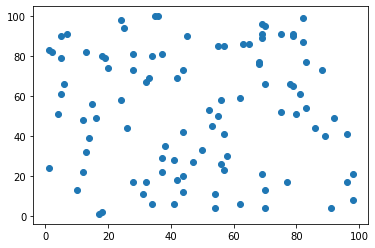

In [50]:
plt.scatter(X1,X2)

In [51]:
tranning_data = [[x1,x2] for x1,x2 in zip(X1,X2)]
#将x1,x2成对组成字列表，合并在一个大列表中

In [52]:
cluster=KMeans(n_clusters=6,max_iter=500)
#设置6个簇中心，单次运行kmeans算法最大次数为500

In [53]:
cluster.fit(tranning_data)#计算k均值聚类

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
cluster.cluster_centers_#返回8个簇中心的坐标

array([[12.66666667, 41.41666667],
       [73.17647059, 52.64705882],
       [71.82352941, 86.70588235],
       [23.43478261, 81.7826087 ],
       [81.22222222, 12.33333333],
       [41.09090909, 19.09090909]])

In [55]:
cluster.labels_#每个点的标签

array([2, 5, 4, 1, 5, 1, 5, 0, 1, 1, 5, 5, 2, 3, 3, 5, 1, 3, 1, 5, 3, 3,
       3, 3, 0, 5, 3, 2, 3, 3, 2, 2, 5, 1, 2, 0, 5, 4, 2, 2, 1, 5, 3, 2,
       4, 2, 1, 4, 3, 5, 1, 1, 0, 1, 1, 0, 2, 0, 3, 2, 4, 2, 0, 5, 3, 3,
       0, 3, 5, 0, 3, 5, 1, 2, 4, 5, 5, 4, 3, 5, 1, 3, 0, 3, 3, 3, 5, 0,
       5, 1, 2, 2, 0, 1, 3, 2, 5, 4, 4, 5])

In [56]:
from collections import defaultdict

In [57]:
centers = defaultdict(list)#defaultdict(list),会构建一个默认value为list的字典


In [58]:
for label,location in zip(cluster.labels_ ,tranning_data):
    centers[label].append(location)
print(centers)

defaultdict(<class 'list'>, {2: [[69, 96], [82, 87], [82, 99], [57, 85], [69, 91], [69, 89], [55, 85], [79, 90], [63, 86], [88, 73], [75, 91], [68, 76], [68, 77], [70, 95], [83, 77], [65, 86], [79, 91]], 5: [[37, 22], [37, 29], [38, 35], [47, 27], [54, 11], [50, 33], [56, 26], [54, 4], [28, 17], [44, 42], [41, 28], [31, 11], [57, 23], [41, 6], [34, 6], [17, 1], [44, 12], [44, 20], [42, 18], [18, 2], [32, 17], [58, 30]], 4: [[98, 8], [98, 21], [70, 13], [69, 21], [70, 4], [91, 4], [96, 17], [62, 6], [77, 17]], 1: [[53, 45], [80, 51], [83, 54], [89, 40], [81, 61], [96, 41], [75, 52], [86, 44], [70, 66], [79, 65], [92, 49], [56, 58], [55, 50], [57, 41], [62, 59], [52, 53], [78, 66]], 0: [[13, 32], [12, 48], [10, 13], [14, 39], [4, 51], [1, 24], [16, 49], [12, 22], [24, 58], [5, 61], [15, 56], [26, 44]], 3: [[20, 74], [33, 69], [28, 81], [45, 90], [42, 69], [18, 80], [34, 80], [19, 79], [7, 91], [28, 73], [5, 90], [13, 82], [1, 83], [32, 67], [5, 79], [44, 73], [6, 66], [35, 100], [37, 81]

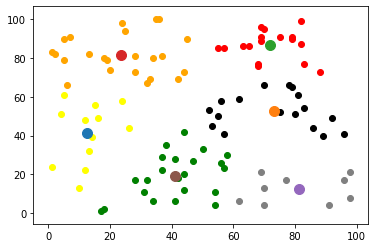

In [59]:
color=['red','green','grey','black','yellow','orange']
for i,c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i],norm=1)#*location，取出location中的所有元素
for center in cluster.cluster_centers_:
    plt.scatter(*center,s=100)

## Kmeans的计算负责度

In [60]:
def distance():return np.sqrt((x1,x2)**2 + (y1-y2)**2)

$$ O(I * N * k * d) $$

N: 10000
k: 100
d: 500
I: 500
-> 10**(5 + 2 + 2 + 2) => 10^11 => 100个亿